<a href="https://colab.research.google.com/github/GeorginaFlesia/GFstuff/blob/master/Series_de_Tiempo_con_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Tiempo con Statsmodels

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Diplomatura Economicas/Recursos/sh_ipc_03_21.xls'
df = pd.read_excel(path, sheet_name='Índices IPC Cobertura Nacional',
                   skiprows=5)

In [ ]:
df.head()

,Total nacional,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nivel general y divisiones COICOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nivel general,100,101.586,103.686,106.148,108.967,110.53,111.848,113.785,115.382,117.572,119.353,120.994,124.796,126.989,130.061,133.105,136.751,139.589,144.805,149.297,155.103,165.238,174.147,179.639,184.255,189.61,196.75,205.957,213.052,219.569,225.537,230.494,239.608,253.71,262.066,273.216,283.444,289.83,295.666,305.551,310.124,314.909,321.974,328.201,337.063,346.621,359.657,371.021,385.883,401.507,415.86
4,Alimentos y bebidas no alcohólicas,100,101.302,103.16,106.014,108.352,109.763,110.748,112.011,114.347,116.405,118.165,119.569,120.36,122.875,125.557,128.469,129.956,134.202,141.151,146.785,152.674,163.391,173.001,178.898,181.936,188.036,198.782,210.628,215.999,221.259,226.903,232.03,242.505,256.376,262.66,276.634,285.297,298.65,306.618,318.678,328.779,331.015,334.464,338.765,350.508,360.869,378.09,388.386,405.287,424.837,441.072


In [ ]:
ipc_gral = df.loc[3,:]

In [ ]:
ipc_gral = ipc_gral.to_frame().T

In [ ]:
ipc_gral = ipc_gral.set_index('Total nacional')

In [ ]:
ipc_gral.columns = pd.Series(pd.to_datetime(ipc_gral.columns)).dt.strftime('%Y-%m')

In [ ]:
ipc_gral = ipc_gral.T
# ipc_gral.head()
ipc_gral

Total nacional,Nivel general
2016-12,100
2017-01,101.586
2017-02,103.686
2017-03,106.148
2017-04,108.967
2017-05,110.53
2017-06,111.848
2017-07,113.785
2017-08,115.382
2017-09,117.572


In [ ]:
px.line(ipc_gral, x=ipc_gral.index, y='Nivel general')

## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from matplotlib import pyplot as plt

In [ ]:
ipc_ts = ipc_gral

In [ ]:
ipc_ts.index = pd.to_datetime(ipc_ts.index, format='%Y-%m')

In [ ]:
ipc_ts.head()

Total nacional,Nivel general
2016-12-01,100
2017-01-01,101.586
2017-02-01,103.686
2017-03-01,106.148
2017-04-01,108.967


In [ ]:
ipc_ts.index.freq = 'MS'
ipc_ts = ipc_ts.astype('float32')

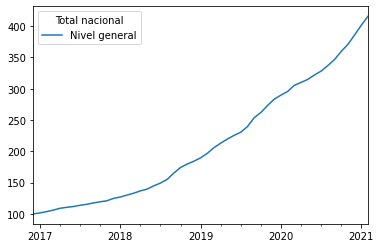

In [ ]:
#plot the data
ipc_ts.plot()

In [ ]:
#split between the training and the test data sets. The last 12 periods form the test data
df_train = ipc_ts.iloc[:-12]
df_test = ipc_ts.iloc[-12:]

In [ ]:
# model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
model = HWES(np.asarray(df_train), seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
#print out the training summary
fitted.summary()

Dep. Variable:,endog,No. Observations:,39
Model:,ExponentialSmoothing,SSE,1719.232
Optimized:,True,AIC,179.657
Trend:,Additive,BIC,206.274
Seasonal:,Multiplicative,AICC,213.857
Seasonal Periods:,12,Date:,"Tue, 30 Mar 2021"
Box-Cox:,False,Time:,21:28:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2631579,alpha,True
smoothing_slope,0.1578937,beta,True


In [ ]:
#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
ipc_forecast = fitted.forecast(steps=12)
ipc_forecast

array([301.05943339, 307.98967863, 314.29058489, 321.00875036,
       327.03940897, 338.38473536, 356.13167666, 366.26666709,
       378.15901265, 386.73269955, 389.81140196, 387.55140302])

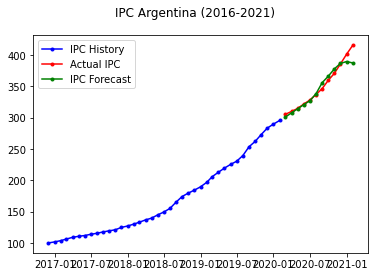

In [ ]:
# plot the training data, the test data and the forecast on the same plot
fig = plt.figure()
fig.suptitle('IPC Argentina (2016-2021)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='IPC History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual IPC')
predicted_future, = plt.plot(df_test.index, ipc_forecast, 'g.-', label='IPC Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

## Auto-Correlation and Parcial Auto-Correlation Function (PACF)

In [ ]:
ipc_acf = sm.tsa.stattools.acf(np.asarray(ipc_ts), fft=False)
ipc_acf

array([ 1.        ,  0.93704928,  0.87535363,  0.81603581,  0.75914102,
        0.70348431,  0.64979036,  0.59647485,  0.54360397,  0.49005492,
        0.43635592,  0.3813625 ,  0.32485613,  0.26987316,  0.2142087 ,
        0.15840306,  0.10438615,  0.0530018 ,  0.00290414, -0.04237126,
       -0.08502432, -0.12654565, -0.1653384 , -0.20131178, -0.23499078,
       -0.2654726 , -0.29336669, -0.31896053, -0.34203016, -0.36260633,
       -0.37907025, -0.39076619, -0.39975676, -0.40549897, -0.40625362,
       -0.40447774, -0.39900996, -0.39027619, -0.37915986, -0.36614766,
       -0.34940498])

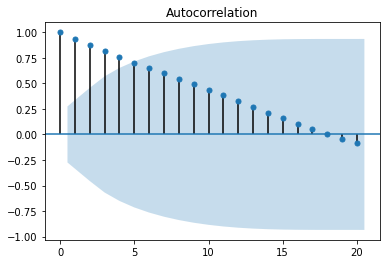

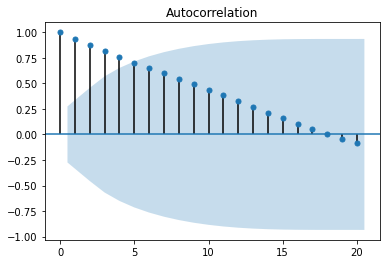

In [ ]:
sm.graphics.tsa.plot_acf(ipc_ts.values, lags=20)

In [ ]:
ipc_pacf = sm.tsa.stattools.pacf(np.asarray(ipc_ts), nlags=40)
ipc_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



array([ 1.        ,  0.95579021, -0.02836444, -0.015684  , -0.01493394,
       -0.02968449, -0.02119515, -0.042966  , -0.04471224, -0.06378948,
       -0.06211504, -0.08484824, -0.09782814, -0.06113902, -0.10318867,
       -0.10571681, -0.08543016, -0.07873393, -0.10812947, -0.05107391,
       -0.09139402, -0.13068246, -0.11415977, -0.13038904, -0.16270066,
       -0.17151997, -0.22734145, -0.30850803, -0.43980101, -0.79467261,
       -3.68800397,  1.36124421,  0.55205554,  0.36497103,  0.31590679,
        0.18237228,  0.18918939,  0.15495225,  0.10141792,  0.06505029,
        0.14186526])

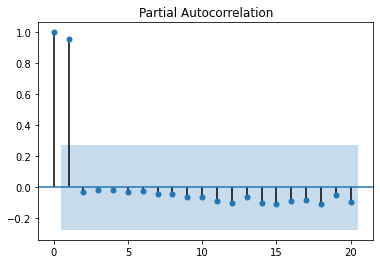

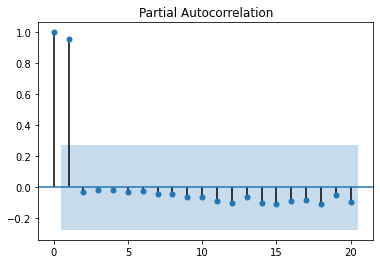

In [ ]:
sm.graphics.tsa.plot_pacf(ipc_ts.values, lags=20)

## ARIMA

In [ ]:
model = sm.tsa.ARIMA(np.asarray(df_train), order=(1, 1, 1))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -80.368
Method:                       css-mle   S.D. of innovations              1.982
Date:                Tue, 30 Mar 2021   AIC                            168.737
Time:                        21:33:40   BIC                            175.287
Sample:                             1   HQIC                           171.067
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8947      1.425      3.436      0.002       2.103       7.687
ar.L1.D.y      0.8222      0.133      6.205      0.000       0.563       1.082
ma.L1.D.y     -0.1287      0.280     -0.460      0.648      -0.677       0.420
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2162           +0.0000j            1.2162            0.0000
MA.1            7.7685           +0.0000j            7.7685            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
ipc_forecast = fitted.forecast(steps=12)

In [ ]:
ipc_forecast[0]

array([301.41806688, 307.01771827, 312.49204057, 317.86331661,
       323.14986746, 328.36675679, 333.52637005, 338.6388906 ,
       343.71269128, 348.75465628, 353.77044579, 358.76471368])

In [ ]:
import plotly.graph_objects as go

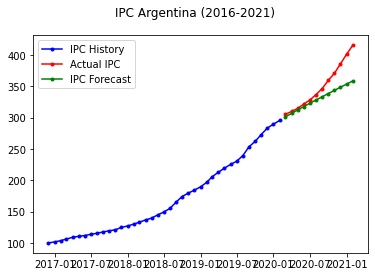

In [ ]:
# plot the training data, the test data and the forecast on the same plot
fig = plt.figure()
fig.suptitle('IPC Argentina (2016-2021)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='IPC History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual IPC')
predicted_future, = plt.plot(df_test.index, ipc_forecast[0], 'g.-', label='IPC Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [ ]:
fig = go.Figure(layout=dict(title=dict(text='IPC Argentina (2016-2021)')))

fig.add_trace(go.Scatter(x=df_train.index, y=df_train['Nivel general'],
                    mode='lines+markers',
                    name='IPC History'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Nivel general'],
                    mode='lines+markers',
                    name='Actual IPC - OOT'))
fig.add_trace(go.Scatter(x=df_test.index, y=ipc_forecast[0],
                    mode='lines+markers',
                    name='IPC Forecast'))

fig

# Documentación

https://www.statsmodels.org/stable/api.html --> statsmodels.tsa.api, tsa.stattools
